In [1]:
import numpy as np
from numpy import cos, sin, pi, random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['font.size'] = 13
mycmap = ListedColormap(["blue","red","gold" ])
from scipy.stats import ortho_group

!mkdir DATA

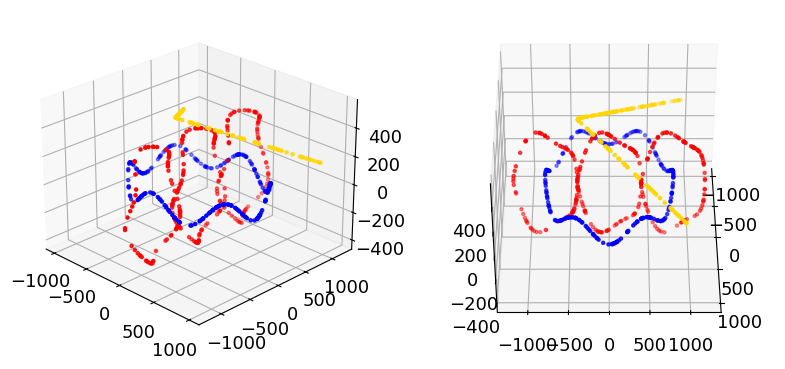

In [2]:
np.random.seed(123)

# number of data samples
N=600
# size of each sample
L=3
LL=12
# rotation
OM  = ortho_group.rvs(dim=L)
OMM = ortho_group.rvs(dim=LL)
#  % of points in cluster 0 and 1
p0,p1=35,45
# radii for 3d construction
R0=800
R1=400

NOISE=5

x,y,r,noise=np.zeros((N,L)),np.zeros(N),np.random.randint(0,100,N),np.random.randn(N,L)*10
xx,nnoise=np.zeros((N,LL)),np.random.randn(N,LL)*10
X,XX=np.zeros_like(x),np.zeros_like(xx)

for n in range(N):
    if r[n]<p0:
        y[n]=0
        q = random.rand()*2*pi
        x[n,:3] = (R0*cos(q), R0*sin(q), -(R0/10)*cos(6*q))
    elif r[n]<p1+p0:
        y[n]=1
        q = random.rand()*2*pi
        x[n,:3] = (-(R1/5)*sin(4*q), R1*cos(q), R1*sin(q))
        x[n,:3] = x[n,:3] + R0*np.array((0,random.randint(3) - 1, 0))
    else:
        y[n]=2
        q = random.rand()*1000.
        x[n,:3] = ((random.randint(2)-0.5)*2*q, 1.333*q-R1, 1.333*R1-0.333*q)
    x[n]+noise[n]
    xx[n,:3] = x[n]
    nnoise[n,3:] = nnoise[n,3:] * NOISE
    xx[n] = xx[n] + nnoise[n]
    X[n] = np.dot(OM,x[n])
    XX[n] = np.dot(OMM,xx[n])
y = y.astype(int)

fig = plt.figure(figsize=(15, 5))
for i in range(2):
    ax = fig.add_subplot(1,3,i+1,projection='3d')
    ax.scatter(x[:,0], x[:,1], x[:,2], s=5, c=y, depthshade=True, cmap=mycmap)
    ax.view_init(25+15*i, 45*(i-1))
    

plt.draw()

np.savetxt("DATA/x_12d.dat",XX,delimiter='\t')
np.savetxt("DATA/y_12d.dat",y,fmt="%d")

x0=np.copy(x)